<h1><center>Markov Chains Project</center></h1>
<h2><center>Team JLRCactus</center></h2>

## Imports ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

## Main ##

### Variables ###

In [48]:
# Values of dimensions n and m (m >= n, for alpha = m/n >= 1)
n = 1000
m = 2000

# Initial random vector
x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1

# To be found vector
X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 

# Known matrix W
W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

beta0=0.1


### Run ###

## Tools ##

In [49]:
def ReLU(x) :
    return x * (x > 0)

In [50]:
def compute_Y(W, X) :
    n = W.shape[1]
    return ReLU((W @ X)/np.sqrt(n))

In [51]:
def compute_H(W, x, Y) :
    diff = Y - compute_Y(W, x)
    return diff.T.dot(diff)

In [52]:
def random_flip(x) :
    i = np.random.randint(low=0, high=len(x))
    new_x = x.copy()
    new_x[i] = -new_x[i]
    return new_x

In [53]:
def accept(W, x0, x1, beta, Y) :
    return min(1, np.exp(-beta*( compute_H(W, x1, Y) - compute_H(W, x0, Y) )))

In [54]:
def rec_error(x0, X, n):
    n = len(X)
    return (x0-X).T.dot(x0-X) / (4*n)

## Metropolis Algorithm ##

In [128]:
def metropolis(W, X, x0, threshold, beta0) :
    
    e = sys.maxsize
    beta = beta0
    Y_true = compute_Y(W, X)
    n = len(X)
    errors = []
    energies = []
    betas = []
    i = 0
    nbre_iter= 5000
    from_last_beta = 0
    beta_augm =0.2
    #treshold = nbre_iter/4.0 *beta_augm
    treshold = 50
    while e > threshold and i < nbre_iter: 
        i +=1
        from_last_beta += 1
        
        x1 = random_flip(x0)
        a = accept(W, x0, x1, beta, Y_true)
        
        if a >= np.random.uniform() : # Swap with prob metropolis
            x0 = x1
        
        if (from_last_beta> treshold and (np.mean(energies[-400:-200]) - np.mean(energies[-200:])) < 30):
            beta += beta_augm
            from_last_beta = 0
            print("change :", i)
        energies.append(compute_H(W, x0, Y_true))        
        e = rec_error(x0, X, n)
        errors.append(e)      
        betas.append(beta)
        
    return x0, errors, energies, betas

In [129]:
found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


change : 668
change : 719
change : 770
change : 821
change : 2030
change : 2081
change : 2132
change : 2183
change : 2234
change : 2285
change : 2701
change : 2752
change : 2803
change : 2854
change : 2905
change : 2956
change : 3007
change : 3058
change : 3109
change : 3160
change : 3327
change : 3378
change : 3429
change : 3480
change : 3531
change : 3582
change : 3633
change : 3684
change : 3735
change : 3786
change : 3837
change : 3888
change : 3939
change : 3990
change : 4041
change : 4092
change : 4143
change : 4194
change : 4245
change : 4296
change : 4347
change : 4398
change : 4449
change : 4500
change : 4551
change : 4602
change : 4653
change : 4704
change : 4755
change : 4806
change : 4857
change : 4908
change : 4959


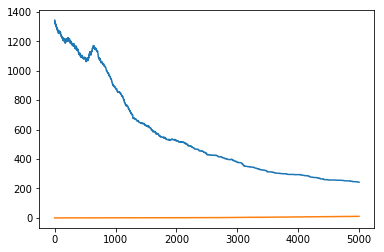

In [130]:
plt.plot(energies)
plt.plot(betas)
plt.show()

In [131]:
betas[-1]

10.699999999999996

In [132]:
min(errors)

0.196

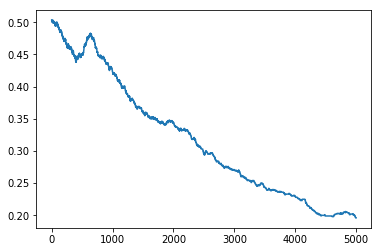

In [133]:
plt.plot(errors)
plt.show()

In [127]:
(found_X != X).sum()

188